In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score,f1_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [3]:
df = pd.read_csv('creditcard.csv')
print(df.head())
print(df.shape)
print(df.describe())
print(df.isnull().values.any())
print(pd.value_counts(df['Class']))

   Time        V1        V2        V3  ...       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3   1.0 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4   2.0 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99      0

[5 rows x 31 columns]
(284807, 31)
                Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  284807.000000
mean    94813.859575  3.919560e-15  ...      88.349619       0.001727
std     47488.145955  1.958696e+00  ...     250.120109       0.041527
min         0.000000 -5.640751e+01  ...       0.000000       0.000000
25%     54201.500000 -9.203734e-01  ...       5.600000       0.000000
50%     84692.000000  1.810880e-02  ...      22.000000       0.000000
75%   

In [4]:
sample = df.sample(frac = 0.1,random_state=1)
sample.shape

(28481, 31)

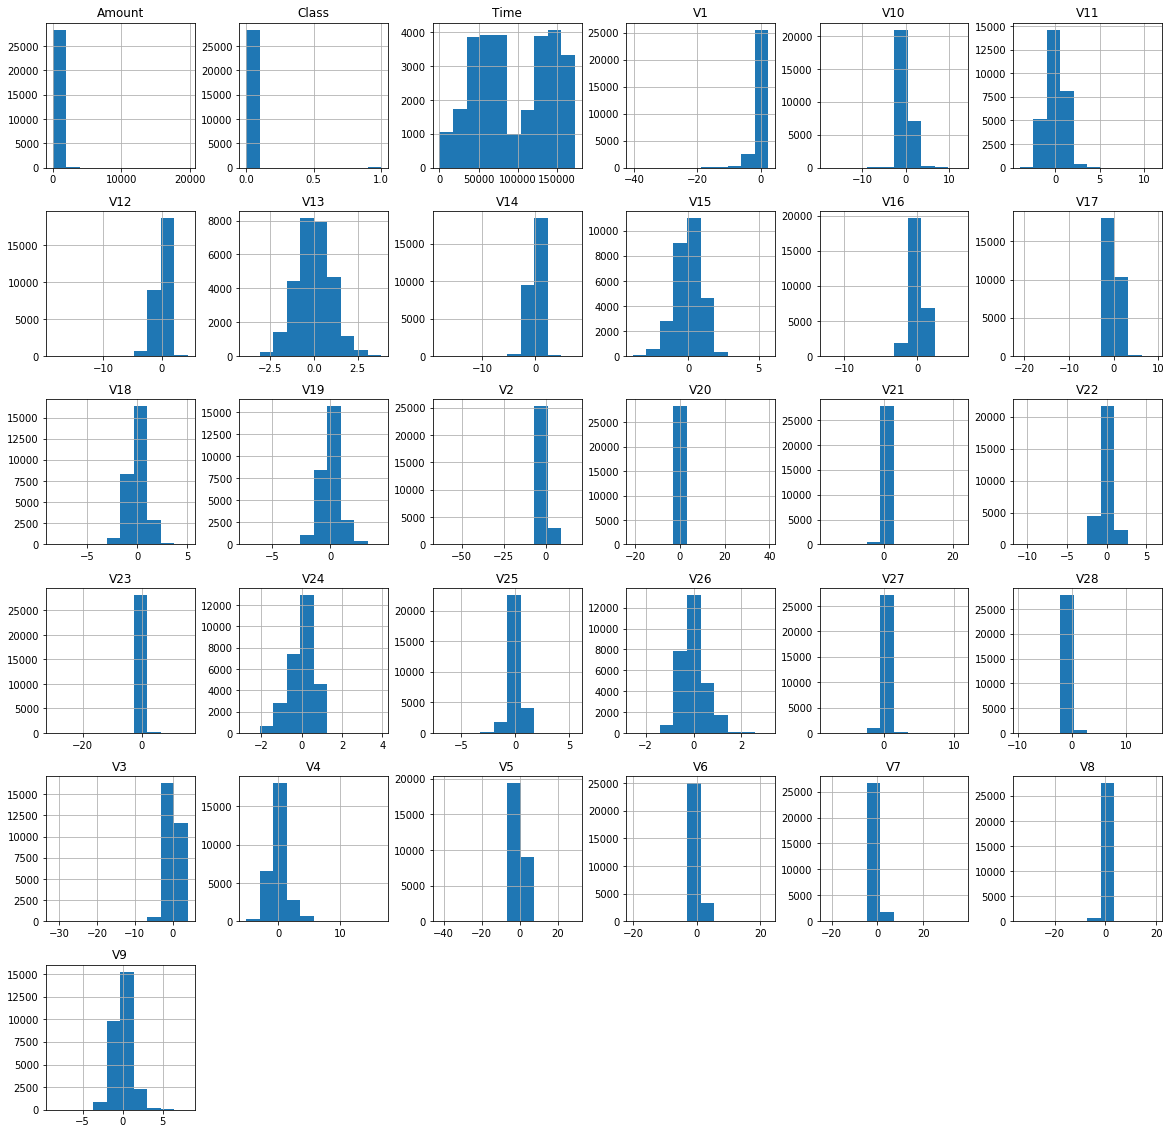

In [5]:
sample.hist(figsize=(20,20))
plt.show()

In [6]:
Fraud = sample[sample['Class']==1]
Not_Fraud = sample[sample['Class']==0]
outlier = len(Fraud)/float(len(Not_Fraud))
print('Number of None-Fraud Transactions',len(Not_Fraud))
print('Number of Fraud Transactions',len(Fraud))

Number of None-Fraud Transactions 28432
Number of Fraud Transactions 49


In [7]:
x= sample.iloc[:,:-1].values
y= sample.iloc[:,-1].values
print(x.shape)
print(y.shape)

(28481, 30)
(28481,)


In [0]:
IF = IsolationForest(n_estimators=100, max_samples=len(x), contamination=outlier, random_state=np.random.RandomState(42), verbose=0)
IF.fit(x)
scores = IF.decision_function(x)
y_pred = IF.predict(x)


In [0]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != y).sum()

In [10]:
print('Number of Outliers Detected by Isolation Forest:', n_errors)

Number of Outliers Detected by Isolation Forest: 77


In [0]:
LOF = LocalOutlierFactor(n_neighbors=20, algorithm='auto', leaf_size=30, metric='minkowski',p=2, metric_params=None, contamination=outlier)
y_pred2 = LOF.fit_predict(x)
scores2 = LOF.negative_outlier_factor_

In [0]:
y_pred2[y_pred2 == 1] = 0
y_pred2[y_pred2 == -1] = 1
n_errors2 = (y_pred2 != y).sum()

In [19]:
print('Number of Outliers Detected by Local Outlier Factor:', n_errors2)

Number of Outliers Detected by Local Outlier Factor: 97


In [0]:
SVM = OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, max_iter=-1, random_state=np.random.RandomState(42))
SVM.fit(x)
y_pred3 = SVM.predict(x)

In [0]:
y_pred3[y_pred3 == 1] = 0
y_pred3[y_pred3 == -1] = 1
n_errors3 = (y_pred3 != y).sum()

In [18]:
print('Number of Outliers Detected by Local Outlier Factor:', n_errors3)

Number of Outliers Detected by Local Outlier Factor: 8516
